<a href="https://colab.research.google.com/github/Bhavya-1209/EDA-on-Bike-Sharing/blob/main/EDA_on_Bike_Sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip /content/bike+sharing+dataset.zip -d /content/unzipped/

Archive:  /content/bike+sharing+dataset.zip
  inflating: /content/unzipped/Readme.txt  
  inflating: /content/unzipped/day.csv  
  inflating: /content/unzipped/hour.csv  


In [31]:
import pandas as pd
day=pd.read_csv('/content/unzipped/day.csv')
hour=pd.read_csv('/content/unzipped/hour.csv')
day['type'] = 'day'
hour['type'] = 'hour'

bike_df=pd.concat([day,hour],ignore_index=True)

In [32]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,type,hr
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,day,NaN
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,day,NaN
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,day,NaN
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,day,NaN
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,day,NaN


In [33]:
bike_df.shape

(18110, 18)

In [34]:
bike_df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


In [35]:
bike_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [36]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
count,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,17379.000000
mean,8354.006405,2.501436,0.502485,6.537051,0.028769,3.003424,0.682772,1.424075,0.496922,0.475718,0.627256,0.190113,68.472336,295.158697,363.631033,11.546752
std,5180.771860,1.107045,0.500008,3.439213,0.167160,2.005677,0.465410,0.635830,0.192177,0.171496,0.191147,0.120851,216.588054,771.555142,950.827954,6.914405
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3797.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,37.000000,43.000000,6.000000
50%,8324.500000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.188951,18.000000,123.000000,152.000000,12.000000
75%,12851.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,55.000000,238.000000,305.000000,18.000000
max,17379.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,3410.000000,6946.000000,8714.000000,23.000000


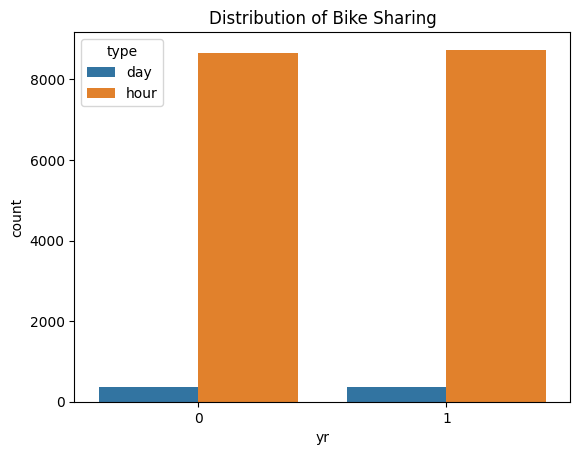

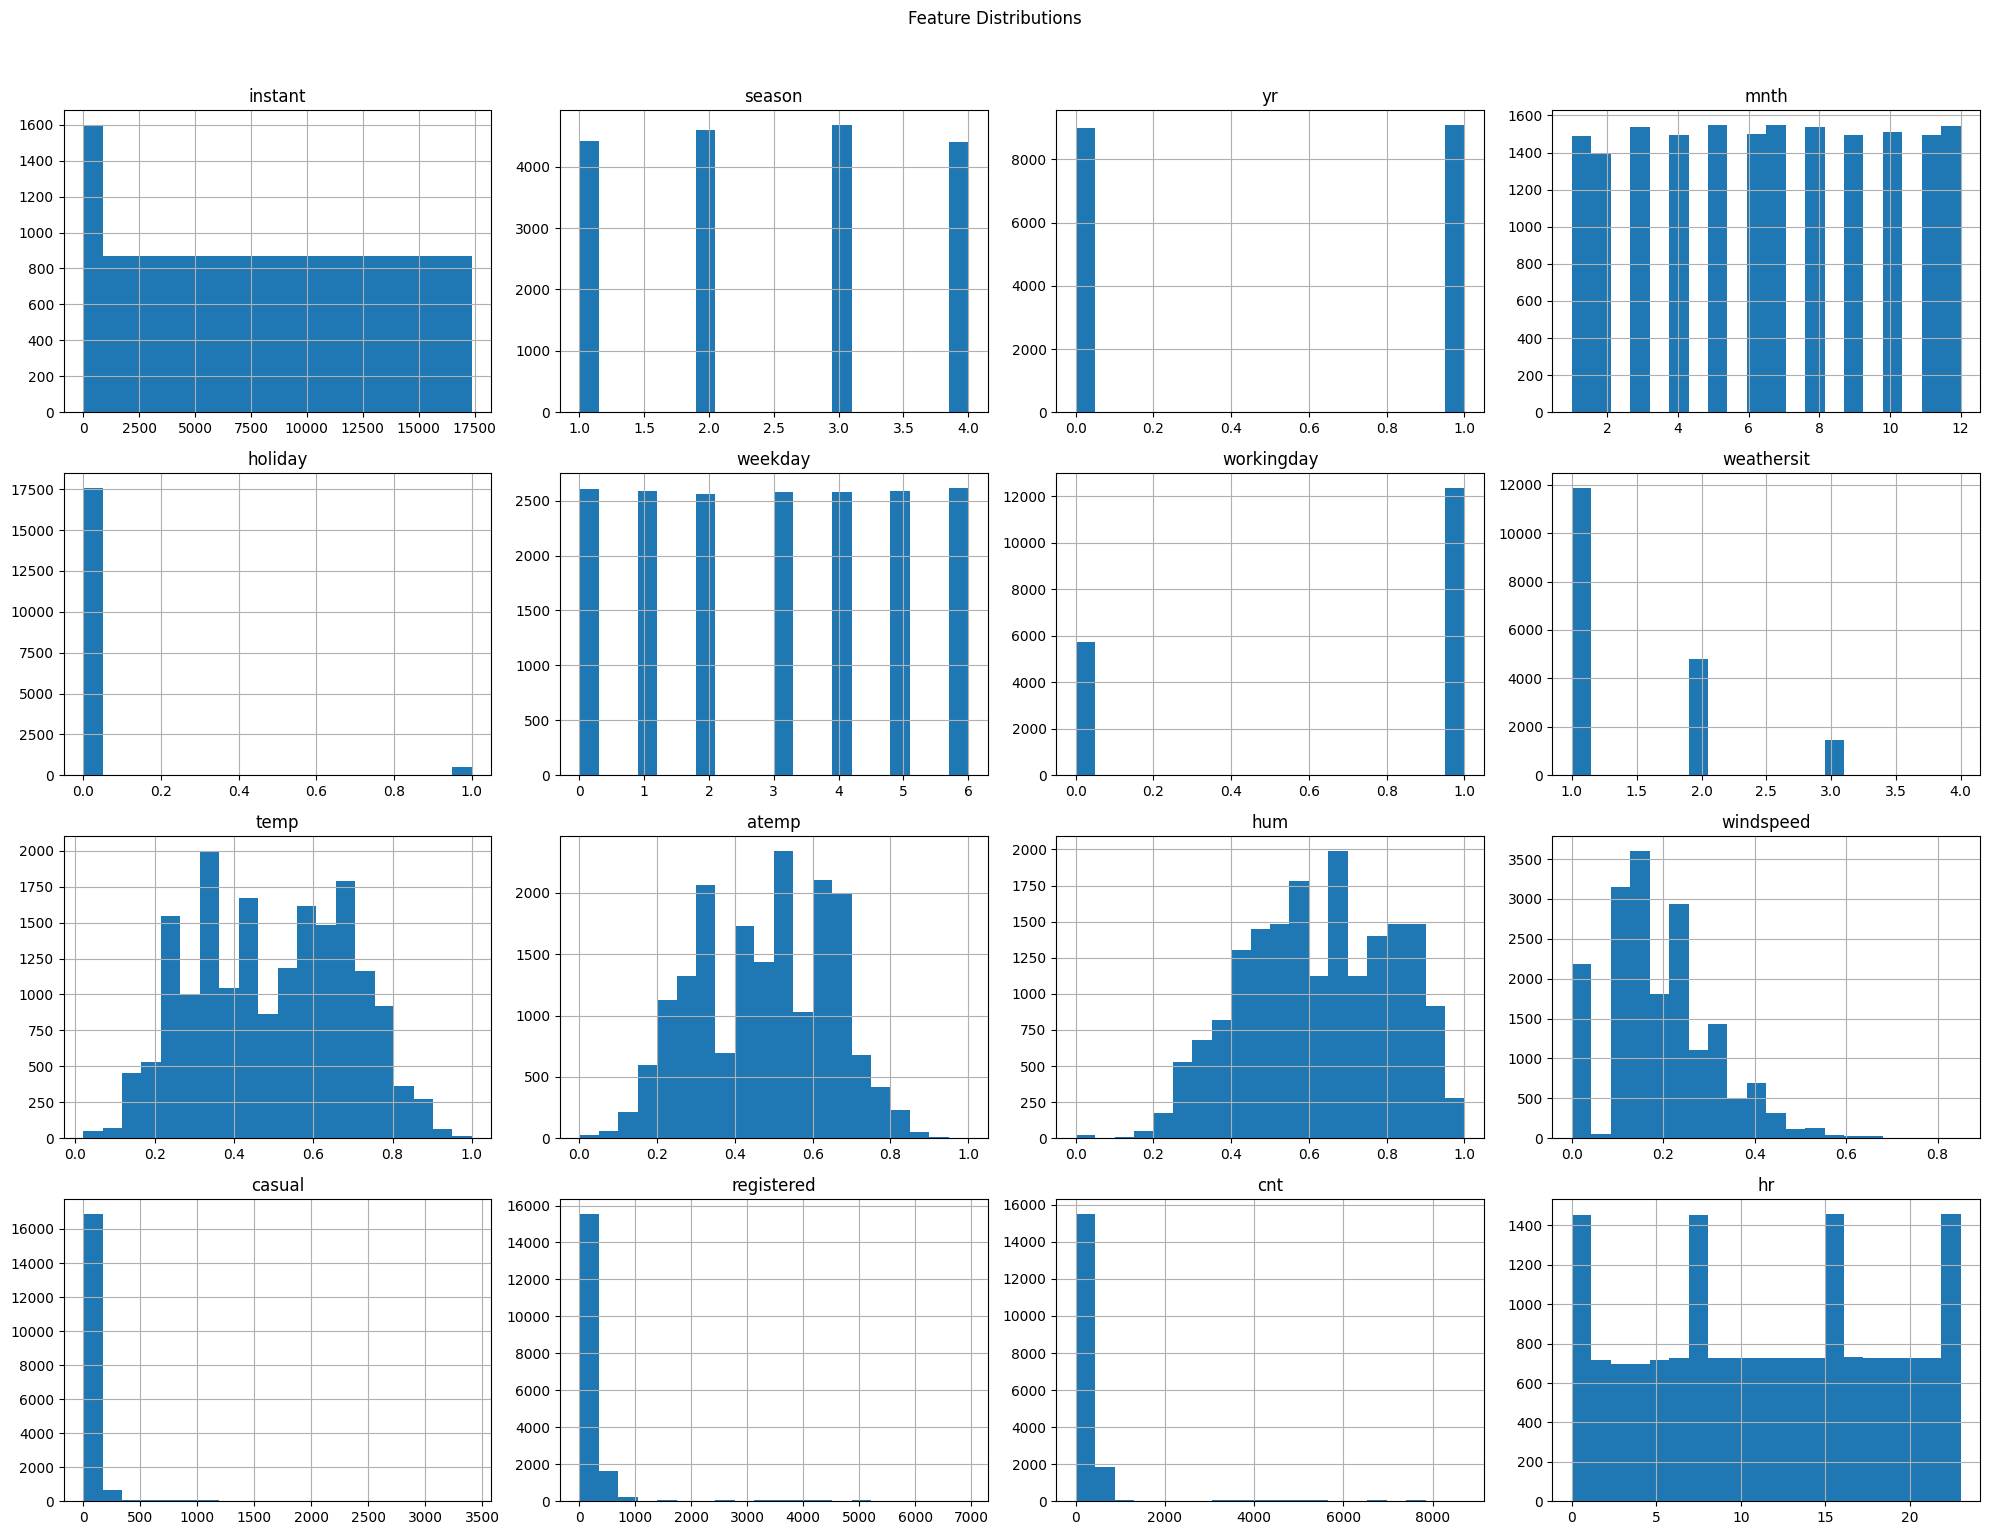

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=bike_df, x='yr', hue='type')
plt.title("Distribution of Bike Sharing")
plt.show()
bike_df.hist(figsize=(20,15), bins=20)
plt.suptitle("Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()

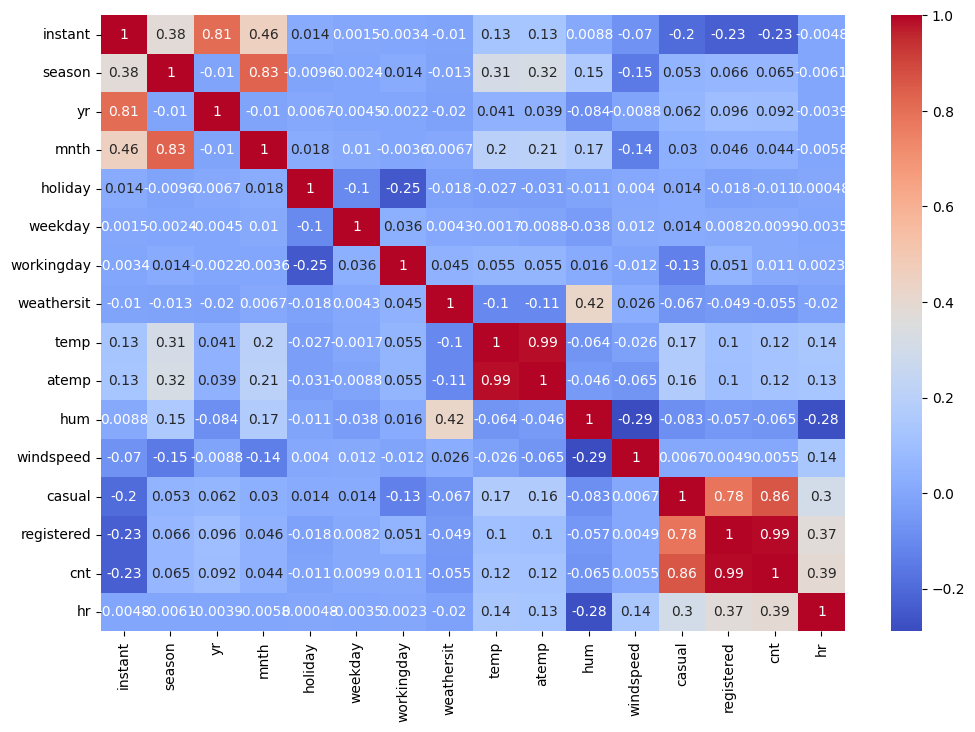

In [38]:
corr=bike_df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()